## Google Analytics Segment Export Analysis

### Checking the working directory

In [1]:
import os
os.getcwd()

'/Users/tanvishthakker/Desktop/BlueOwl'

### Importing Pandas library for Data Manipulation and Analysis while Numpy for numerical operations

In [2]:
import pandas as pd
import numpy as np

### Reading csv into a data frame and skipping the unwanted Google Analytics information rows 

In [3]:
testFile = pd.read_csv("GA.csv",skiprows=6)

In [4]:
testFile

,Day Index,Users,Page Views
0,01/01/2019,38,229
1,02/01/2019,98,521
2,03/01/2019,82,467
3,04/01/2019,88,572
4,05/01/2019,50,426
5,06/01/2019,52,392
6,07/01/2019,128,827
7,08/01/2019,111,631
8,09/01/2019,121,812
9,10/01/2019,117,785


### Ignoring the 31st row i.e. the total row in Google Analytics export

In [5]:
df = testFile.iloc[0:31,0:3]
df

,Day Index,Users,Page Views
0,01/01/2019,38,229
1,02/01/2019,98,521
2,03/01/2019,82,467
3,04/01/2019,88,572
4,05/01/2019,50,426
5,06/01/2019,52,392
6,07/01/2019,128,827
7,08/01/2019,111,631
8,09/01/2019,121,812
9,10/01/2019,117,785


### Coverting 'Day Index' column to Datetime format for Date and Week manipulation

In [6]:
df['Day Index'] = pd.to_datetime(df['Day Index'],format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
Day Index     31 non-null datetime64[ns]
Users         31 non-null object
Page Views    31 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 824.0+ bytes


### Assigning week numbers based on dates
Note: January 1st was a Tuesday and January 6th was a Sunday 

In [7]:
df['Week_Number'] = df['Day Index'].dt.week
df

,Day Index,Users,Page Views,Week_Number
0,2019-01-01,38,229,1
1,2019-01-02,98,521,1
2,2019-01-03,82,467,1
3,2019-01-04,88,572,1
4,2019-01-05,50,426,1
5,2019-01-06,52,392,1
6,2019-01-07,128,827,2
7,2019-01-08,111,631,2
8,2019-01-09,121,812,2
9,2019-01-10,117,785,2


### Converting 'Page Views' and 'Users' to Integer type data format while converting 'Week_Number' into string object for easy Grouping

In [8]:
df['Page Views'] = df['Page Views'].astype('int64')
df['Users'] = df['Users'].astype('int64')
df['Week_Number'] = df['Week_Number'].apply(str)

### Checking for format transformations

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
Day Index      31 non-null datetime64[ns]
Users          31 non-null int64
Page Views     31 non-null int64
Week_Number    31 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.0+ KB


### Grouping 'Week_Number' while simultaneously adding 'Page Views' and 'Users' for that week

In [10]:
df1 = df.groupby(['Week_Number']).sum()
df1

,Users,Page Views
Week_Number,,
1,408,2607
2,698,4573
3,566,4087
4,631,3718
5,505,3005


### Plotting and Labeling 'Week_Number' and 'Page Views'

Text(0, 0.5, 'Page views')

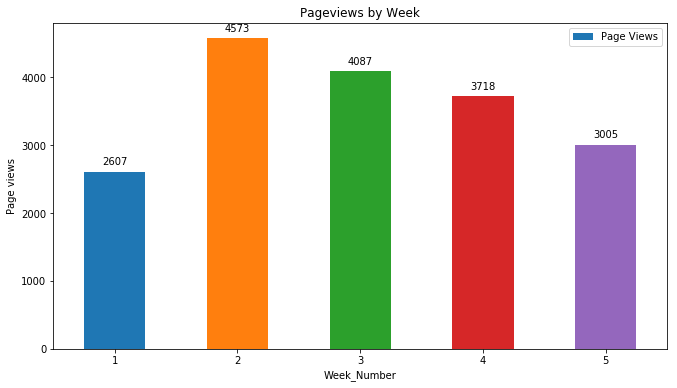

In [14]:
ax = df1.reset_index().plot(x='Week_Number', y='Page Views',kind ='bar',figsize = (11,6), title = 'Pageviews by Week')

for p in ax.patches:               # For Bar Plot data labels
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for tick in ax.get_xticklabels():  # To rotate X-axis data labels
    tick.set_rotation(0)  
ax.set_ylabel('Page views')

### Calculating Pageviews per User for each day

In [12]:
df['Pageviews per User'] = df['Page Views']/df['Users']
df

,Day Index,Users,Page Views,Week_Number,Pageviews per User
0,2019-01-01,38,229,1,6.026316
1,2019-01-02,98,521,1,5.316327
2,2019-01-03,82,467,1,5.695122
3,2019-01-04,88,572,1,6.500000
4,2019-01-05,50,426,1,8.520000
5,2019-01-06,52,392,1,7.538462
6,2019-01-07,128,827,2,6.460938
7,2019-01-08,111,631,2,5.684685
8,2019-01-09,121,812,2,6.710744
9,2019-01-10,117,785,2,6.709402


### Plotting Pageviews per User for each day in the month of January

Text(0, 0.5, 'Pageviews per User')

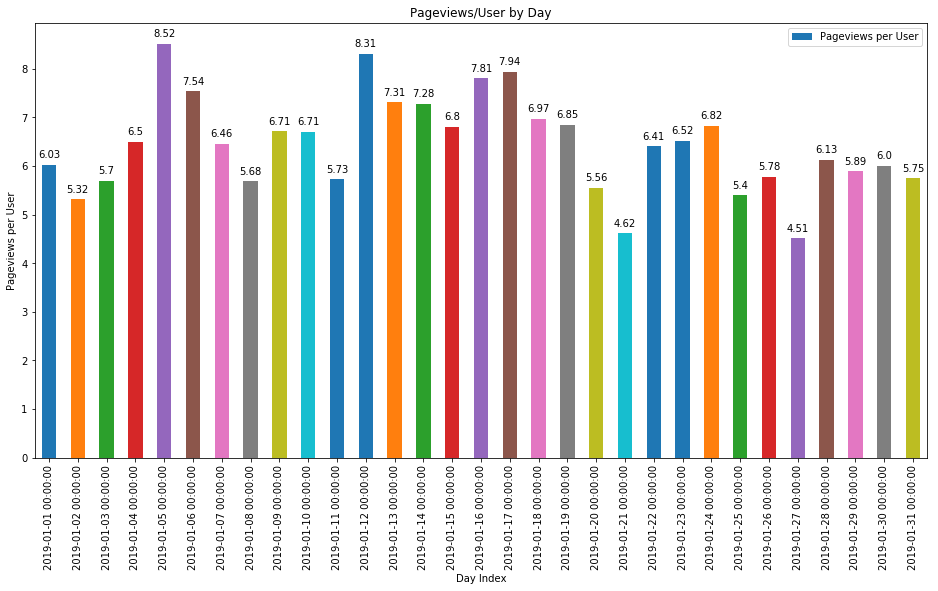

In [13]:
bx = df.plot(x='Day Index', y='Pageviews per User',kind='bar',figsize = (16,8), title= 'Pageviews/User by Day')
for p in bx.patches: 
    bx.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
bx.set_ylabel('Pageviews per User')